Bienvenu dans le notebook du projet de Clarisse et Nicolas : tracking des avions atterissant et décollant de Orly et Roissy (entre autres) le jeudi 06/10 entre 14h30 et 15h30 !
 

Pour ce projet, il est nécessaie d'importer la bibliothèque bibliotheque_exo pour pouvoir manipuler les objets FlightCollection et Flight permettant de traiter et d'afficher les données.

In [124]:
import pandas as pd
from bibliotheque_exo import FlightCollection
from cartes.crs import Lambert93
import numpy as np

D'autres bibliothèques sont nécessaires, pour tracer le fond de carte mais aussi tracer les trajectoires des vols.

In [125]:
import geopandas as gpg
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon
from descartes import PolygonPatch

Il est maintenant nécessaire de fournir au programme les chemins vers les données nécessaires au fond de carte :

In [126]:
#Chemins fond de carte Nicolas
#chemin_routes = r"C:\Users\Nicolas\pyweek\projet\geography.git\geography\Route500\1_DONNEES_LIVRAISON_2021-05-00142\R500_3-0_SHP_LAMB93_FXX-ED211\RESEAU_ROUTIER\TRONCON_ROUTE.shp"
#chemin_fleuves = r"C:\Users\Nicolas\pyweek\projet\geography.git\geography\Route500\1_DONNEES_LIVRAISON_2021-05-00142\R500_3-0_SHP_LAMB93_FXX-ED211\HABILLAGE\TRONCON_HYDROGRAPHIQUE.shp"
#chemin_communes = r"C:\Users\Nicolas\pyweek\projet\geography.git\geography\Route500\1_DONNEES_LIVRAISON_2021-05-00142\R500_3-0_SHP_LAMB93_FXX-ED211\ADMINISTRATIF\COMMUNE.shp"

# Chemins fond de carte Clarisse
chemin_routes = "/Users/clarissele/pyweek/projet/ROUTE500_3-0__SHP_LAMB93_FXX_2021-05-21/ROUTE500/1_DONNEES_LIVRAISON_2021-05-00142/R500_3-0_SHP_LAMB93_FXX-ED211/RESEAU_ROUTIER/TRONCON_ROUTE.shp"
chemin_fleuves = "/Users/clarissele/pyweek/projet/ROUTE500_3-0__SHP_LAMB93_FXX_2021-05-21/ROUTE500/1_DONNEES_LIVRAISON_2021-05-00142/R500_3-0_SHP_LAMB93_FXX-ED211/HABILLAGE/TRONCON_HYDROGRAPHIQUE.shp"
chemin_communes = "/Users/clarissele/pyweek/projet/ROUTE500_3-0__SHP_LAMB93_FXX_2021-05-21/ROUTE500/1_DONNEES_LIVRAISON_2021-05-00142/R500_3-0_SHP_LAMB93_FXX-ED211/ADMINISTRATIF/COMMUNE.shp"


Récupération des données : (cette étape peut durer assez longtemps)

In [127]:
#Chargement des routes t = 2 min 4s
routes = gpg.read_file(chemin_routes)
typeroute = [p for p in routes["VOCATION"]]
routegeometry = [p for p in routes["geometry"]]
nbr_autoroute = 0
autoroutegeometry = []
j = 0
for i in range(0, len(typeroute) - 1):
    if typeroute[i] == "Type autoroutier":
        nbr_autoroute = nbr_autoroute + 1
        autoroutegeometry.append(routegeometry[i])
print("liste d'autoroutes construite : " + str(nbr_autoroute) + " entrees ")

liste d'autoroutes construite : 14763 entrees 


In [128]:
#Chargement des fleuves t = 1.4 s
fleuve = gpg.read_file(chemin_fleuves)

nom_fleuve = [p for p in fleuve["TOPONYME"]]
fleuvegeometry = [p for p in fleuve["geometry"]]
print("liste de fleuves construite : " + str(len(fleuvegeometry)) + " entrees ")

liste de fleuves construite : 10530 entrees 


In [129]:
#Chargement des communes t = 3.6s
filin = gpg.read_file(chemin_communes)

nom_commune = [p for p in filin["ID_RTE500"]]
communesgeometry = [p for p in filin["geometry"]]
print(
    "liste de communes construite : " + str(len(communesgeometry)) + " entrees "
)

liste de communes construite : 34836 entrees 


Toutes les données pour le fond de cartes, celles qui mettent le plus de temps à charger sont récupérées. Traitons maintenant celles des mesures réalisées. Commençons par indiquer où trouver les données :

In [130]:
#"/Users/clarissele/Cecile_ADSB_EHS_RAW_20211007_dump1090.pkl"
chemin = "/Users/clarissele/ADSB_EHS_RAW_20211007_dump1090_C_et_N.pkl"


Maintenant, chargeons les dans le notebook :

In [131]:
data = pd.read_pickle(chemin)
tous_vols = FlightCollection(data)

Si l'on souhaite utiliser les données de tout le monde :

In [132]:
#En considérant les données de tout le monde :
data_nous = pd.read_pickle(
    "/Users/clarissele/ADSB_EHS_RAW_20211007_dump1090_C_et_N.pkl"
)

data_autres = pd.read_pickle(
    "/Users/clarissele/ADSB_EHS_RAW_20211007_dump1090.pkl"
)

data_autres2 = pd.read_pickle(
    "/Users/clarissele/Cecile_ADSB_EHS_RAW_20211007_dump1090.pkl"
)
data_autres3 = pd.read_pickle(
    "/Users/clarissele/Benjamin_ADSB_EHS_RAW_20211007_dump1090.pkl"
)
data = pd.concat([data_autres,data_autres2, data_autres3])
data = data.sort_values("timestamp").reset_index(drop=True)
tous_vols = FlightCollection(data)

Enfin, traçons les vols sur le fond de carte :

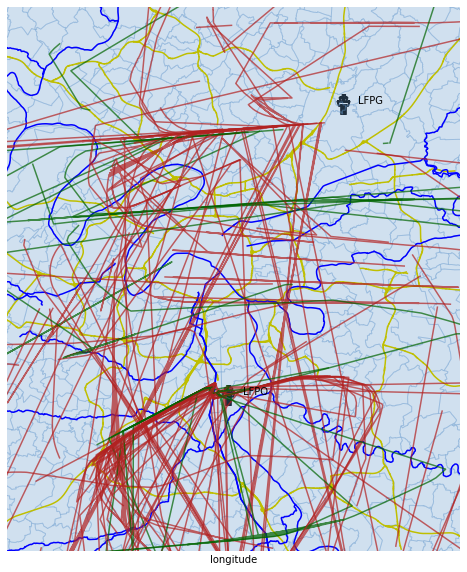

In [133]:
fig, ax = plt.subplots(
    figsize=(20, 10), subplot_kw=dict(projection=Lambert93())
)

for i in range(0, len(autoroutegeometry) - 1):
    auto_x = [p[0] for p in list(autoroutegeometry[i].coords)]
    auto_y = [p[1] for p in list(autoroutegeometry[i].coords)]
    ax.plot(auto_x, auto_y, "y")

for i in range(0, len(fleuvegeometry) - 1):
    fleuve_x = [p[0] for p in list(fleuvegeometry[i].coords)]
    fleuve_y = [p[1] for p in list(fleuvegeometry[i].coords)]
    ax.plot(fleuve_x, fleuve_y, "b")

for s in communesgeometry:
    if s.geom_type == "Polygon":
        s = MultiPolygon([s])
    for idx, p in enumerate(s):
        ax.add_patch(
            PolygonPatch(p, fc="#6699cc", ec="#6699cc", alpha=0.3, zorder=2)
        )

for vol in tous_vols:
    vol.plot(ax)


from traffic.data import airports
airports["CDG"].point.plot(ax)
airports["ORY"].point.plot(ax)

ax.axis("scaled")
ax.set_frame_on(False)
ax.set_xlim((0.63e6, 0.68e6))
ax.set_ylim((6.83e6, 6.89e6))
#ax.set_extent((1, 3, 48.5, 49))
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Certains éléments permettant de différencier les vols (atterissage, décollage, juste de passage) n'ont pas été fixés au hasard.

Pour éliminer les vols de passage, c'est à dire ne se posant ni n'atterissant en Ile-de-France, on observe la répartition des altitudes de vols des avions captés :

<AxesSubplot:ylabel='Frequency'>

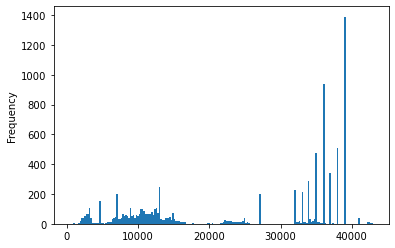

In [77]:
data["altitude"].plot.hist(bins=200)

On remarque que certains volent au dessus de 30 000 pieds, ce qui corresponde à l'altitude de croisière des avions de ligne.

D'autre part, ils faut différencier les avions restant, si ils atterissent ou si ils décollent. Pour cela, on fait la moyenne de la vitesse verticale pour chaque vol :

<AxesSubplot:ylabel='Frequency'>

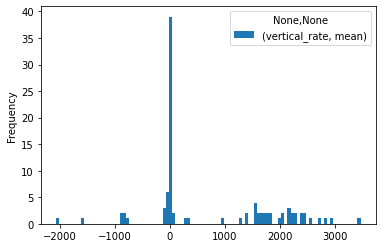

In [135]:
data.groupby("callsign").agg(dict(vertical_rate=["mean"])).plot.hist(bins=100)

On observe que beaucoups de vols sembles avoir un vitesses verticale moyenne quasi nulle : ceux qui ne font que passer. On decide alors de fixer un pallier haut à +500 pour les decollages, et -500 pour les atterissages.

On souhaite maintenant établir une carte des vents en fonction des mesures des angles 'heading' et 'track', ainsi que la vitesse réelle et la vitesse au sol.
Pour cela, on manipule la base de données 'data' pour :
- réaliser une interpolation des mesures (trous initiallement présents)
- construire de nouvelles colonnes avec les coordonnées du vecteur vitesse en chaque point dans un repère orthonormé.


Rechargeons les données :

In [134]:
data = pd.read_pickle(chemin)
tous_vols = FlightCollection(data)

On interpole :

In [136]:
data["groundspeed"].fillna(method="ffill").fillna(method="bfill")
print(data["groundspeed"].isna().sum())
data = data.assign(groundspeed=data["groundspeed"].fillna(method="ffill").fillna(method="bfill"))
print(data["groundspeed"].isna().sum())

12780
0


In [137]:
data["heading"].fillna(method="ffill").fillna(method="bfill")
print(data["heading"].isna().sum())
data = data.assign(heading=data["heading"].fillna(method="ffill").fillna(method="bfill"))
data=data.assign(heading=lambda x: np.radians(x.heading))
print(data["heading"].isna().sum())

13414
0


In [138]:

data["track"].fillna(method="ffill").fillna(method="bfill")
print(data["track"].isna().sum())
data = data.assign(track=data["track"].fillna(method="ffill").fillna(method="bfill"))
data=data.assign(track=lambda x: np.radians(x.track))

print(data["track"].isna().sum())

12780
0


In [139]:
data["TAS"].fillna(method="ffill").fillna(method="bfill")
print(data["TAS"].isna().sum())
data = data.assign(TAS=data["TAS"].fillna(method="ffill").fillna(method="bfill"))
print(data["TAS"].isna().sum())

15946
0


On crée de nouvelles colonnes pour cos et sin de track et de heading :

In [140]:
data=data.assign(cos_track=lambda x: np.cos(x.track))
data=data.assign(sin_track=lambda x: np.sin(x.track))
data=data.assign(cos_heading=lambda x: np.cos(x.heading))
data=data.assign(sin_heading=lambda x: np.sin(x.heading))

On crée les nouvelles colonnes pour les coordonnées selon u et v du vent :

In [141]:
data = data.assign(wind_u=data['groundspeed']*data['sin_track']-data['TAS']*data['sin_heading'])
data = data.assign(wind_v=data['groundspeed']*data['cos_track']-data['TAS']*data['cos_heading'])
#data=data.assign(wind_u=lambda x: x.wind_u/100)
#data=data.assign(wind_v=lambda x: x.wind_v/100)


On peut préciser les points que l'on souhaite tracer.

In [142]:
#data = data.assign(longitude=data["longitude"].fillna(method="ffill").fillna(method="bfill"))
#data = data.assign(latitude=data["latitude"].fillna(method="ffill").fillna(method="bfill"))
#data = data[data['latitude'].notna()]

Il ne reste qu'à tracer, les coordonnées du vecteur vent sont maintenant disponible dans le dataframe.

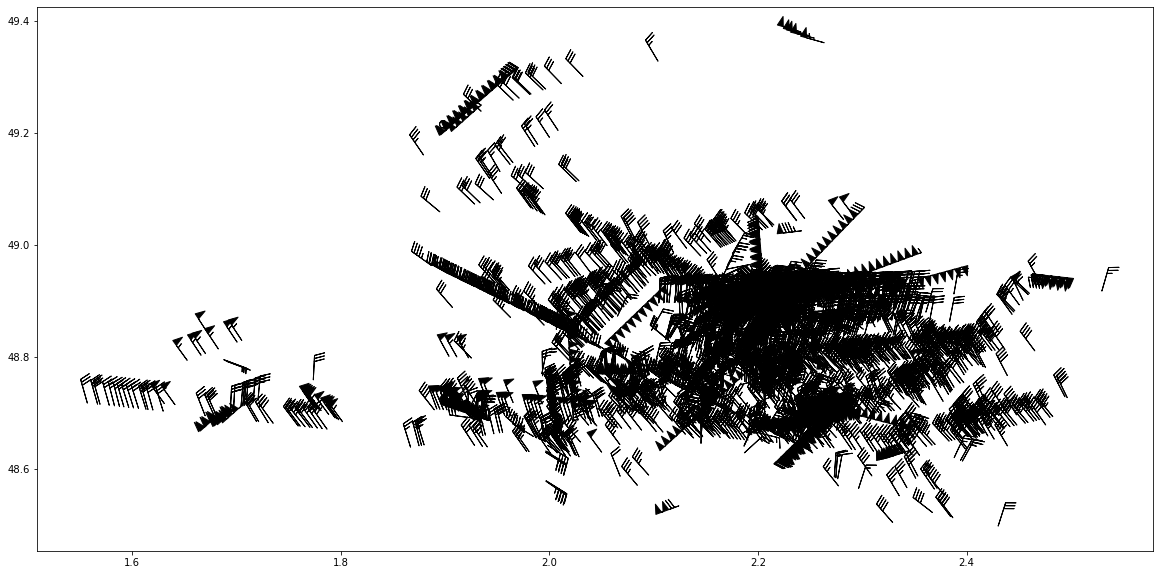

In [146]:
#from traffic.data import airports
fig, ax = plt.subplots(
    figsize=(20, 10)#, subplot_kw=dict(projection=Lambert93())
)
#ax.coastlines("50m")

ax.barbs(data["longitude"],data["latitude"],data["wind_u"],data["wind_v"])#,length=8, pivot='middle')

#airports["CDG"].point.plot(ax)
#airports["ORY"].point.plot(ax)
#ax.axis("scaled")
#ax.set_frame_on(False)
#ax.set_xlim((0.63e6, 0.68e6))
#ax.set_ylim((6.83e6, 6.89e6))
#ax.set_extent((1, 3, 48.5, 49))
#ax.set_xticks([])
#ax.set_yticks([])
plt.show()